# 📃 Solution for Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [3]:
# solution
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=3)
forest.fit(data_train, target_train)
target_predicted = forest.predict(data_test)
print(f"Mean absolute error: "
      f"{mean_absolute_error(target_test, target_predicted):.3f} grams")

Mean absolute error: 367.147 grams


We now aim to plot the predictions from the individual trees in the forest.
For that purpose you have to create first a new dataset containing evenly
spaced values for the flipper length over the interval between 170 mm and 230
mm.

In [4]:
# solution
import numpy as np

data_range = pd.DataFrame(np.linspace(170, 235, num=300),
                          columns=data.columns)

The trees contained in the forest that you created can be accessed with the
attribute `estimators_`. Use them to predict the body mass corresponding to
the values in this newly created dataset. Similarly find the predictions of
the random forest in this dataset.

In [5]:
# solution
tree_predictions = []

for tree in forest.estimators_:
    # we convert `data_range` into a NumPy array to avoid a warning raised in scikit-learn
    tree_predictions.append(tree.predict(data_range.to_numpy()))

forest_predictions = forest.predict(data_range)

Now make a plot that displays:
- the whole `data` using a scatter plot;
- the decision of each individual tree;
- the decision of the random forest.

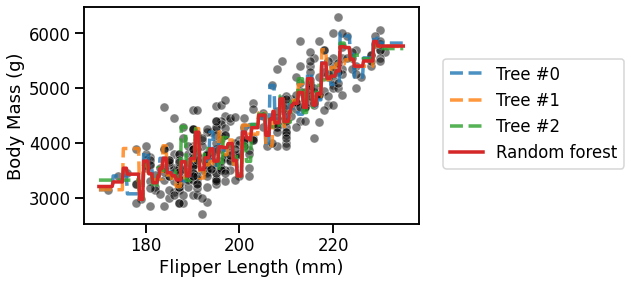

In [6]:
# solution
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)

# plot tree predictions
for tree_idx, predictions in enumerate(tree_predictions):
    plt.plot(data_range[feature_name], predictions, label=f"Tree #{tree_idx}",
             linestyle="--", alpha=0.8)

plt.plot(data_range[feature_name], forest_predictions, label=f"Random forest")
_ = plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")

In [7]:
tree_predictions

[array([3150.        , 3150.        , 3150.        , 3150.        ,
        3150.        , 3150.        , 3150.        , 3150.        ,
        3150.        , 3150.        , 3150.        , 3150.        ,
        3150.        , 3150.        , 3400.        , 3400.        ,
        3400.        , 3400.        , 3400.        , 3400.        ,
        3400.        , 3400.        , 3400.        , 3400.        ,
        3400.        , 3400.        , 3400.        , 3400.        ,
        3075.        , 3075.        , 3075.        , 3075.        ,
        3075.        , 3075.        , 3075.        , 3075.        ,
        3075.        , 3075.        , 3075.        , 3075.        ,
        2975.        , 2975.        , 2975.        , 2975.        ,
        3825.        , 3825.        , 3825.        , 3825.        ,
        3825.        , 3532.14285714, 3532.14285714, 3532.14285714,
        3532.14285714, 3300.        , 3300.        , 3300.        ,
        3300.        , 3300.        , 3300.     